In [6]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

%matplotlib inline

In [2]:
os.chdir('/Users/damian/Documents/LakeHill/Projects/ThinkfulMentor/data')

OSError: [Errno 2] No such file or directory: '/Users/damian/Documents/LakeHill/Projects/ThinkfulMentor/data'

In [ ]:
dfAllCols = pd.read_csv('ny.gdp.mktp.cd_Indicator_en_csv_v2.csv', skiprows=2)

In [ ]:
dfAllCols.dtypes

In [3]:
columns = ['Country Name','Country Code','Indicator Name','Indicator Code',
           '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
df1999to2010 = pd.read_csv('ny.gdp.mktp.cd_Indicator_en_csv_v2.csv', skiprows=2, usecols=columns)

IOError: File ny.gdp.mktp.cd_Indicator_en_csv_v2.csv does not exist

In [4]:
df1999to2010.head()

NameError: name 'df1999to2010' is not defined

In [7]:
# get UN data
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"

r = requests.get(url)

In [8]:
soup = BeautifulSoup(r.content)
#soup('table')[6]

In [9]:
#for tag in soup.find_all(re.compile("^t")):
#    print(tag.name)

A = soup('table')[6].findAll('tr', {'class': 'tcont'})
#A = soup('table')[6].findAll('tr')

print len(A[6])
print A

25
[<tr class="tcont">
<td height="19">Afghanistan</td>
<td align="right" height="19">2004</td>
<td height="19"> </td>
<td height="19">a</td>
<td align="right" height="19" width="71">8</td>
<td width="6"></td>
<td height="19" width="51"></td>
<td align="right" height="19" width="72">11</td>
<td width="6"></td>
<td height="19" width="53"></td>
<td align="right" height="19" width="64">5</td>
<td height="19" width="59"></td>
</tr>, <tr class="tcont">
<td height="19">Albania</td>
<td align="right" height="19">2004</td>
<td height="19"> </td>
<td height="19">a</td>
<td align="right" height="19">11</td>
<td></td>
<td height="19"></td>
<td align="right" height="19">11</td>
<td></td>
<td height="19"></td>
<td align="right" height="19">11</td>
<td height="19"></td>
</tr>, <tr class="tcont">
<td height="19">Algeria</td>
<td align="right" height="19">2005</td>
<td height="19"> </td>
<td height="19">a</td>
<td align="right" height="19">13</td>
<td></td>
<td height="19"></td>
<td align="right" heig

In [12]:
B = [x for x in A if len(x)==25] #removing records without value
print B[0]

<tr class="tcont">
<td height="19">Afghanistan</td>
<td align="right" height="19">2004</td>
<td height="19"> </td>
<td height="19">a</td>
<td align="right" height="19" width="71">8</td>
<td width="6"></td>
<td height="19" width="51"></td>
<td align="right" height="19" width="72">11</td>
<td width="6"></td>
<td height="19" width="53"></td>
<td align="right" height="19" width="64">5</td>
<td height="19" width="59"></td>
</tr>


In [13]:
print(len(B))

93


In [12]:
records = []

for rows in B:
    col = rows.findAll('td')
    country = col[0].string
    year = col[1].string
    total = col[4].string
    men = col[7].string
    women = col[10].string
    record = (country, year, total, men, women)
    records.append(record)

column_name = ['country', 'year', 'total', 'men', 'women']

table = pd.DataFrame(records, columns = column_name)

In [14]:
len(table)

183

In [15]:
table.year.unique().tolist()

[u'2004',
 u'2005',
 u'2008',
 u'2000',
 u'2007',
 u'2009',
 u'2006',
 u'2001',
 u'2002',
 u'2003',
 u'2010',
 u'1999']

In [16]:
# compare the length of the two frames
#print len(df1999to2010)
print len(table)

183


In [17]:
table.head()

,country,year,total,men,women
0,Afghanistan,2004,8,11,5
1,Albania,2004,11,11,11
2,Algeria,2005,13,13,13
3,Andorra,2008,11,11,12
4,Anguilla,2008,11,11,11


In [18]:
table.set_index('country', inplace=True)

In [19]:
table.head()

,year,total,men,women
country,,,,
Afghanistan,2004,8,11,5
Albania,2004,11,11,11
Algeria,2005,13,13,13
Andorra,2008,11,11,12
Anguilla,2008,11,11,11


In [42]:
df1999to2010.set_index('Country Name', inplace=True)

In [43]:
merged = pd.merge(table, df1999to2010, how='inner', left_index=True, right_index=True)

In [46]:
merged.head()

,year,total,men,women,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Andorra,2008,11,11,12,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,1.456199e+09,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN
Afghanistan,2004,8,11,5,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,4.128818e+09,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10
Albania,2004,11,11,11,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,4.449373e+09,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10
United Arab Emirates,2003,11,11,12,ARE,GDP (current US$),NY.GDP.MKTP.CD,8.444548e+10,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535475e+11,2.860493e+11
Austria,2008,15,15,15,AUT,GDP (current US$),NY.GDP.MKTP.CD,2.167253e+11,1.964217e+11,1.969536e+11,2.129707e+11,2.607215e+11,2.998703e+11,3.146412e+11,3.342922e+11,3.864391e+11,4.276274e+11,3.975703e+11,3.896561e+11


In [55]:
merged['CommonYear'] = merged.apply(lambda x: x['year'], axis=1)
merged['CommonGDP'] = merged.apply(lambda x: x[x['year']], axis=1)

In [57]:
merged.head()

,year,total,men,women,Country Code,Indicator Name,Indicator Code,1999,2000,2001,...,2003,2004,2005,2006,2007,2008,2009,2010,CommonGDP,CommonYear
Andorra,2008,11,11,12,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,...,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN,3.712034e+09,2008
Afghanistan,2004,8,11,5,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,...,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10,5.285462e+09,2004
Albania,2004,11,11,11,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,...,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10,7.464447e+09,2004
United Arab Emirates,2003,11,11,12,ARE,GDP (current US$),NY.GDP.MKTP.CD,8.444548e+10,1.043374e+11,1.033116e+11,...,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535475e+11,2.860493e+11,1.243464e+11,2003
Austria,2008,15,15,15,AUT,GDP (current US$),NY.GDP.MKTP.CD,2.167253e+11,1.964217e+11,1.969536e+11,...,2.607215e+11,2.998703e+11,3.146412e+11,3.342922e+11,3.864391e+11,4.276274e+11,3.975703e+11,3.896561e+11,4.276274e+11,2008


In [58]:
finalDataFrame = merged[['year', 'total', 'men', 'women', 'CommonGDP']]

In [59]:
finalDataFrame.head()

,year,total,men,women,CommonGDP
Andorra,2008,11,11,12,3.712034e+09
Afghanistan,2004,8,11,5,5.285462e+09
Albania,2004,11,11,11,7.464447e+09
United Arab Emirates,2003,11,11,12,1.243464e+11
Austria,2008,15,15,15,4.276274e+11


In [60]:
    import numpy as np
    finalDataFrame['logGDP'] = np.log(finalDataFrame['CommonGDP']) 

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
    finalDataFrame.sort('CommonGDP', ascending=True, inplace=True)

/Library/Python/2.7/site-packages/pandas/core/frame.py:2798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, kind=kind, na_position=na_position)


In [70]:
finalDataFrame.head()

,year,total,men,women,CommonGDP,logGDP
Tonga,2004,14,14,14,2.407946e+08,19.299455
Samoa,2001,12,12,12,2.730884e+08,19.425306
Comoros,2004,11,12,10,3.681431e+08,19.723982
Guinea-Bissau,2000,9,7,5,3.701739e+08,19.729483
Solomon Islands,2006,9,9,9,4.567354e+08,19.939615


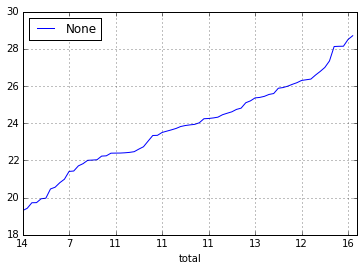

In [73]:
finalDataFrame.plot('total', 'logGDP')

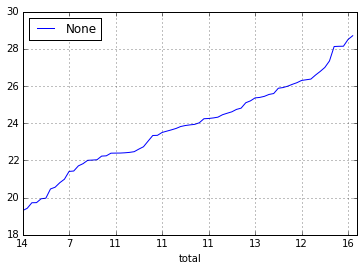

In [76]:
finalDataFrame.plot('total', 'logGDP')

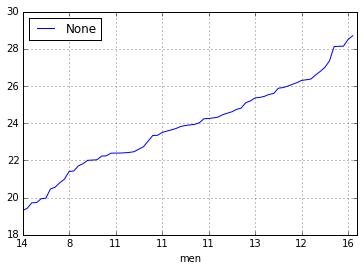

In [77]:
finalDataFrame.plot('men', 'logGDP')

In [80]:
finalDataFrame['deltaAttainment'] = finalDataFrame['men'].astype('int') - finalDataFrame['women'].astype('int')

-c:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
sDeltas = finalDataFrame.deltaAttainment.value_counts()

In [88]:
sDeltas = sDeltas.sort_index(ascending=True)

In [89]:
sDeltas

-3     1
-2     7
-1    24
 0    23
 1     7
 2     6
 3     4
 6     1
dtype: int64

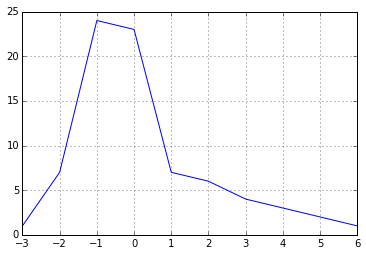

In [91]:
sDeltas.plot()

In [92]:
merged.head()

,year,total,men,women,Country Code,Indicator Name,Indicator Code,1999,2000,2001,...,2003,2004,2005,2006,2007,2008,2009,2010,CommonGDP,CommonYear
Andorra,2008,11,11,12,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,...,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN,3.712034e+09,2008
Afghanistan,2004,8,11,5,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,...,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10,5.285462e+09,2004
Albania,2004,11,11,11,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,...,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10,7.464447e+09,2004
United Arab Emirates,2003,11,11,12,ARE,GDP (current US$),NY.GDP.MKTP.CD,8.444548e+10,1.043374e+11,1.033116e+11,...,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535475e+11,2.860493e+11,1.243464e+11,2003
Austria,2008,15,15,15,AUT,GDP (current US$),NY.GDP.MKTP.CD,2.167253e+11,1.964217e+11,1.969536e+11,...,2.607215e+11,2.998703e+11,3.146412e+11,3.342922e+11,3.864391e+11,4.276274e+11,3.975703e+11,3.896561e+11,4.276274e+11,2008
